In [ ]:
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
training_data_folder_path = '/content/drive/MyDrive/Dataset/Train/'
test_data_folder_path = '/content/drive/MyDrive/Dataset/Test/'


In [ ]:
#showing training data
for imgpath in os.listdir('/content/drive/MyDrive/Dataset/Train/'):
    for filename in os.listdir('/content/drive/MyDrive/Dataset/Train/'+ imgpath):
          filename = '/content/drive/MyDrive/Dataset/Train/' + imgpath + '/' + filename
          img=cv.imread(filename)
          cv2_imshow(img)
          cv.waitKey(0)

In [ ]:
haar_cascade='/content/drive/MyDrive/haarcascade_frontalface.xml'

In [ ]:
def detect_face(input_img):
    image = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
    face_cascade = cv.CascadeClassifier(haar_cascade)
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.01, minNeighbors=8);
    if (len(faces) == 0):
        return -1, -1
    (x, y, w, h) = faces[0]
    return image[y:y+w, x:x+h], faces[0]

In [ ]:
def prepare_training_data(training_data_folder_path):
    detected_faces = []
    face_labels = []
    
    for filename in os.listdir(training_data_folder_path):
        label = str(filename)
        for imgpath in os.listdir(training_data_folder_path+filename):
            imgpath=training_data_folder_path+filename+'/'+imgpath
            image = cv.imread(imgpath)
            face, rect = detect_face(image)
            if face is not -1:
                resized_face = cv.resize(face, (600,600), interpolation = cv.INTER_AREA)
                detected_faces.append(face)
                face_labels.append(label)

    return detected_faces, face_labels

In [ ]:
detected_faces, face_labels = prepare_training_data("/content/drive/MyDrive/Dataset/Train/")

In [ ]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  195
Total labels:  195


In [ ]:
face_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
lbphfaces_recognizer = cv.face.LBPHFaceRecognizer_create(radius=1, neighbors=8)

le = LabelEncoder()
face_labels = le.fit_transform(face_labels)

In [ ]:
face_labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
lbphfaces_recognizer.train(detected_faces, np.array(face_labels))

In [ ]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)

def draw_text(test_image, label_text, x, y):
    cv.putText(test_image, label_text, (x, y), cv.FONT_HERSHEY_PLAIN, 1.5, (255, 0 , 0), 2)

def predict(test_image):
    face, rect = detect_face(test_image)
    label= lbphfaces_recognizer.predict(face)
    label_text = tags[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [ ]:
tags = ['2018-2-60-064', '2019-1-60-032', '2019-1-60-034', '2019-1-60-055', '2019-1-60-066','2019-1-60-066','2019-1-60-075','2019-1-60-098']

In [ ]:
test_image = cv.imread("/content/drive/MyDrive/Dataset/Train/2019-1-60-032/4.jpg")

In [ ]:
predicted_image, label = predict(test_image)

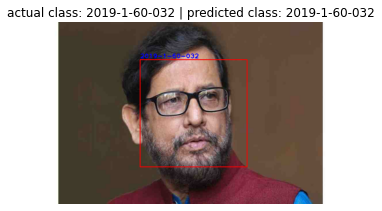

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[1]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
imgplot = plt.imshow(cv.cvtColor(predicted_image, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
l=[]
a=[]
for imgpath1 in os.listdir('/content/drive/MyDrive/Dataset/Test/'):
    for filename in os.listdir('/content/drive/MyDrive/Dataset/Test/'+ imgpath1):
          filename = '/content/drive/MyDrive/Dataset/Test/' + imgpath1 + '/' + filename
          img=cv.imread(filename)
          pred,lab=predict(img)
          a.append(imgpath1)
          l.append(lab)
          print('Actual class :'+imgpath1+' predicted class :'+lab)

Actual class :2019-1-60-098 predicted class :2019-1-60-066
Actual class :2019-1-60-098 predicted class :2019-1-60-098
Actual class :2019-1-60-098 predicted class :2019-1-60-034
Actual class :2019-1-60-098 predicted class :2019-1-60-098
Actual class :2019-1-60-098 predicted class :2019-1-60-034
Actual class :2019-1-60-075 predicted class :2019-1-60-066
Actual class :2019-1-60-075 predicted class :2019-1-60-066
Actual class :2019-1-60-075 predicted class :2019-1-60-034
Actual class :2019-1-60-075 predicted class :2019-1-60-034
Actual class :2019-1-60-075 predicted class :2019-1-60-034
Actual class :2019-1-60-034 predicted class :2019-1-60-034
Actual class :2019-1-60-034 predicted class :2019-1-60-034
Actual class :2019-1-60-034 predicted class :2019-1-60-034
Actual class :2019-1-60-034 predicted class :2019-1-60-034
Actual class :2019-1-60-034 predicted class :2019-1-60-034
Actual class :2018-2-60-064 predicted class :2019-1-60-075
Actual class :2018-2-60-064 predicted class :2019-1-60-0

In [ ]:
print(a)
print(l)

['2019-1-60-098', '2019-1-60-098', '2019-1-60-098', '2019-1-60-098', '2019-1-60-098', '2019-1-60-075', '2019-1-60-075', '2019-1-60-075', '2019-1-60-075', '2019-1-60-075', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2018-2-60-064', '2018-2-60-064', '2018-2-60-064', '2018-2-60-064', '2018-2-60-064', '2019-1-60-060', '2019-1-60-060', '2019-1-60-060', '2019-1-60-060', '2019-1-60-060', '2019-1-60-055', '2019-1-60-055', '2019-1-60-055', '2019-1-60-055', '2019-1-60-055', '2019-1-60-032', '2019-1-60-032', '2019-1-60-032', '2019-1-60-032', '2019-1-60-032', '2019-1-60-066', '2019-1-60-066', '2019-1-60-066', '2019-1-60-066', '2019-1-60-066']
['2019-1-60-066', '2019-1-60-098', '2019-1-60-034', '2019-1-60-098', '2019-1-60-034', '2019-1-60-066', '2019-1-60-066', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-034', '2019-1-60-075', '2019-1-60-034', '2019-1-60-075', '2019-1-60-0

In [ ]:
le = LabelEncoder()
imgpath1=le.fit_transform(a)
lab = le.fit_transform(l)
def print_confusion_matrix(confusion_matrix,class_names,figsize=(10,7),fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.57      0.80      0.67         5
           2       0.29      1.00      0.45         5
           3       1.00      0.40      0.57         5
           4       0.12      0.20      0.15         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5

    accuracy                           0.30        40
   macro avg       0.25      0.30      0.23        40
weighted avg       0.25      0.30      0.23        40



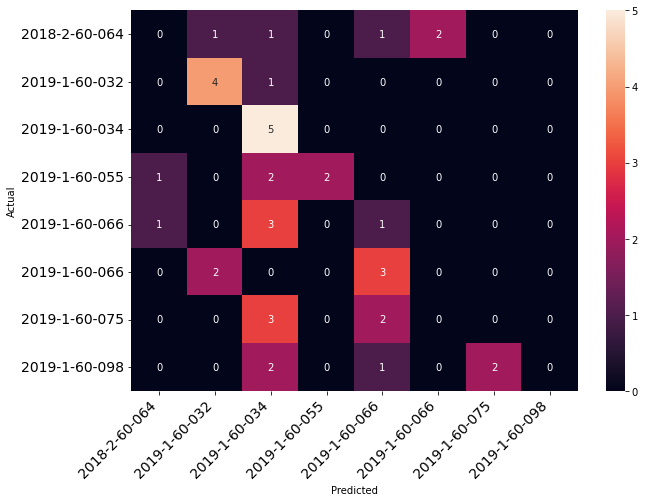

In [ ]:
cm = confusion_matrix (imgpath1, lab)
print_confusion_matrix(cm,['2018-2-60-064', '2019-1-60-032', '2019-1-60-034', '2019-1-60-055', '2019-1-60-066','2019-1-60-066','2019-1-60-075','2019-1-60-098'])
print(classification_report(imgpath1,lab))